# Brief History of Data Science
Data science has become the popular field it is today, all thanks to the rise of technology especially programming languages, and techniques for collecting, analyzing, and interpreting data. In 1962-63, an American mathematician, John W. Tukey predicted the rise of a new field in his paper “The Future of Data Analysis”. Another pioneer, Peter Naur, who was a computer engineer, gave the earliest definition of data science in his book “Concise Survey of Computer Methods”. 

In two decades technology advanced, data collection exploded, and personal computers were launched by IBM in 1981. Apple followed suit in 1983. Throughout the 80s, computing evolved at an exponential rate, giving companies the opportunity to digitally transform and collect data easily. In the 90s, technology made huge strides by making internet connectivity, communication, and (of course) data collection practically widespread. 

By the mid 2000s, data became more important and organizations became more interested in finding patterns and making better business decisions. The demand for data scientists grew dramatically in various parts of the world and data science still continues to be one of the most thriving fields today. 

# ABOUT THE DATASET
 Data Science Job Salaries Dataset contains 11 columns
*  work_year : The year the salary was paid.
*  experience_level : The experience level in the job during the year
*  employment_type : The type of employment for the role
*  job_title : The role worked in during the year.
*  salary : The total gross salary amount paid.
*  salary_currency : The currency of the salary paid as an ISO 4217 currency code.
*  salaryinusd : The salary in USD
* employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio : The overall amount of work done remotely
*  company_location : The country of the employer's main office or contracting branch
*  company_size : The median number of people that worked for the company during the year

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [3]:
#remove first column
df.drop(columns= df.columns[0],axis=1, inplace= True)

In [4]:
# rename columns value to make sense
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df.employment_type.replace(['FT','PT','CT','FL'], ['Full-time', 'Part-time', 'Contract', 'Freelance'],inplace= True)
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.company_size.replace(['L','S','M'], ['Large', 'Small', 'medium'],inplace= True)

In [5]:
#look if there are null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#look for duplicaded values, if there remove it
print('duplicated values: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

duplicated values: 42


**Now our data is ready to be analysis**

In [7]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,3,50,3
top,NaN,Senior,Full-time,Data Scientist,NaN,USD,NaN,US,Remote,US,medium
freq,NaN,243,546,130,NaN,359,NaN,295,346,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,NaN,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,NaN,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,NaN,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,NaN,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,NaN,NaN,NaN


In [8]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
70,2020,Mid,Full-time,Data Scientist,55000,EUR,62726,FR,Hybrid,LU,Small
528,2022,Senior,Full-time,Data Analyst,100000,USD,100000,US,Remote,US,medium
216,2021,Entry,Part-time,Computer Vision Engineer,180000,DKK,28609,DK,Hybrid,DK,Small
49,2020,Mid,Full-time,Data Engineer,61500,EUR,70139,FR,Hybrid,FR,Large
60,2020,Mid,Full-time,Data Engineer,110000,USD,110000,US,Remote,US,Large
142,2021,Senior,Full-time,Data Engineering Manager,150000,USD,150000,US,On-site,US,Large
413,2022,Mid,Full-time,Data Engineer,45000,EUR,49461,GR,Remote,GR,medium
345,2022,Senior,Full-time,Data Engineer,156600,USD,156600,US,Remote,US,medium
151,2021,Mid,Full-time,Data Scientist,150000,USD,150000,US,Remote,US,medium
369,2022,Senior,Full-time,Data Scientist,170000,USD,170000,US,Remote,US,medium


# 1- UNIVARIENT ANALYSIS

In [9]:
#this function is used to plot countplot chart
def count_plot(x_axis, title):
    plt.figure(figsize=(20,6))
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=x_axis)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show();

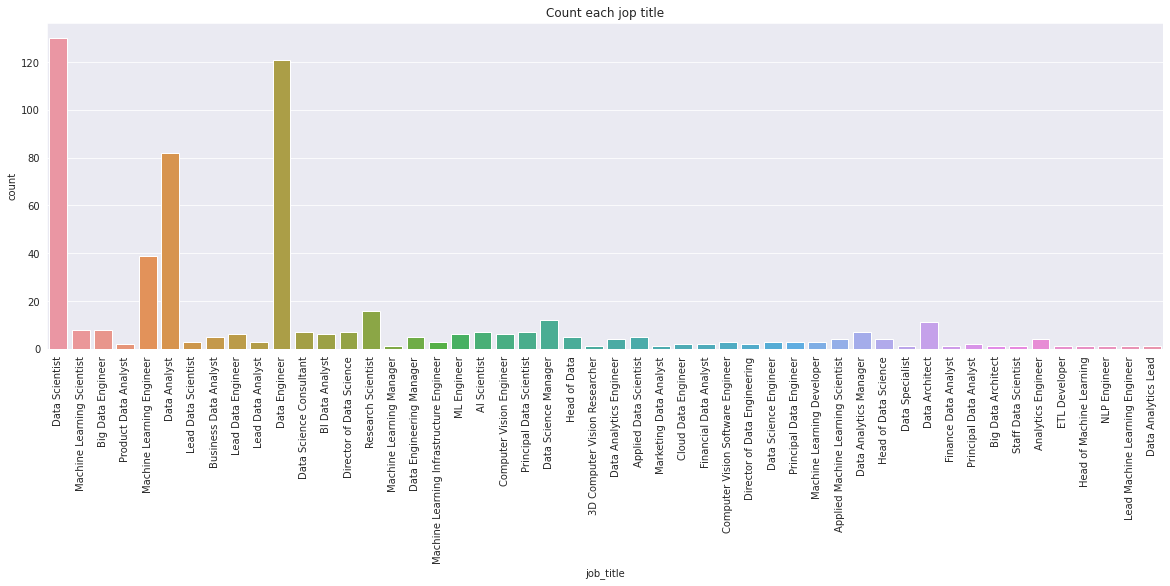

In [10]:
count_plot('job_title', 'Count each jop title')


**As we see from the chart, the most popluer jobs are (Data Scientist, Data Engineer, Data Analyst)**

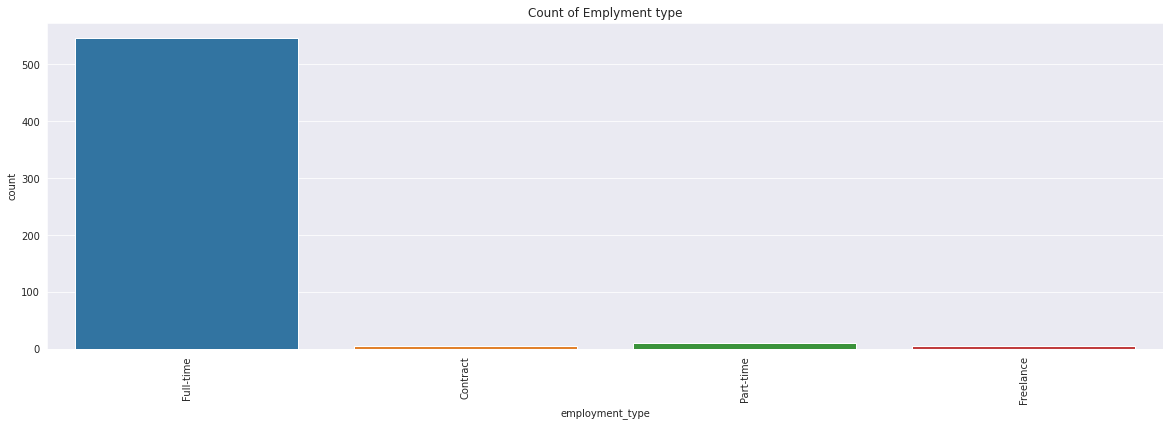

In [11]:
count_plot('employment_type', 'Count of Emplyment type')

**As we see from the chart, the most popluer Count of Emplyment type is (Part Time)**

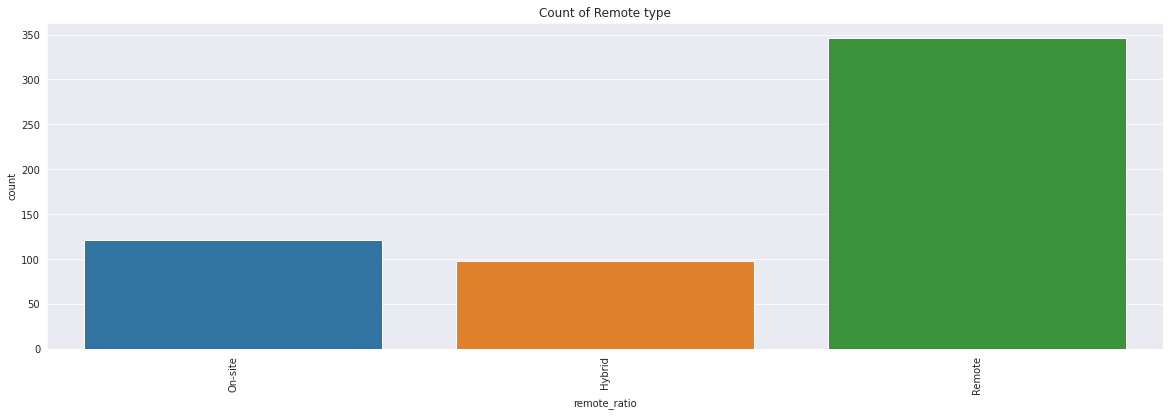

In [12]:
count_plot('remote_ratio', 'Count of Remote type')

**As we see from the chart, the most popluer Count of Remote type is (Fully Remote), and that will make us deduce that all jobs go in the way to be Remote**

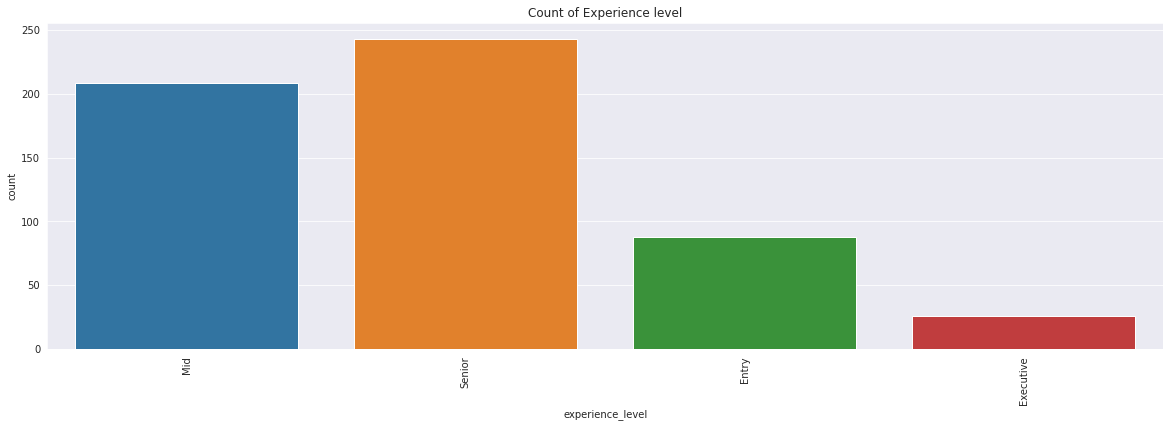

In [13]:
count_plot('experience_level', 'Count of Experience level')

**As we see from the chart, the most popluer Count of Experience level is (Senior)**

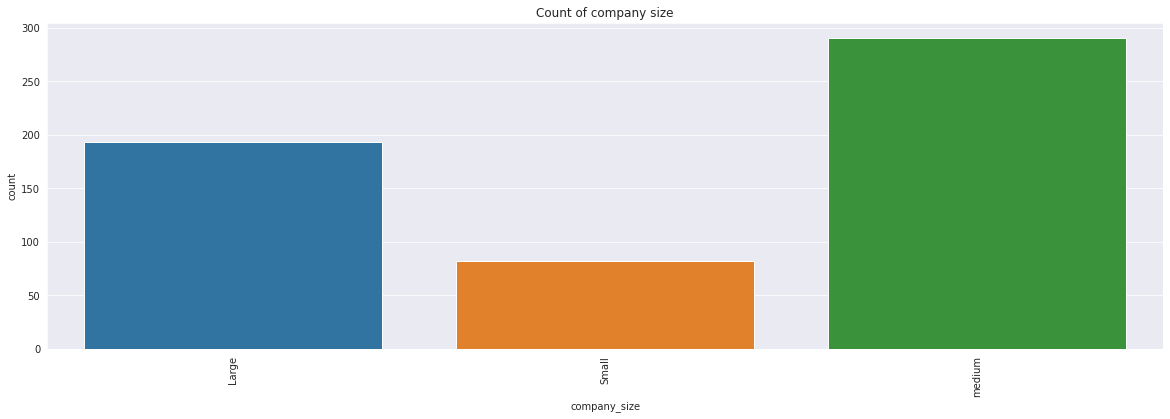

In [14]:
count_plot('company_size', 'Count of company size')

**As we see from the chart, the most popluer Count of company size is (Medium)**

In [15]:
ax2= px.treemap(df,path=['company_location'],title="Company Location")
ax2.show()

**Most of the companies are located in the United States**

# 2- Analysis based on Top 3 Jobs (Data Scientist, Data Engineer, Data Analyst)

In [16]:
#get only data realdted to there 3 jobs (Data Scientist, Data Engineer, Data Analyst)
get_jobs = df.set_index('job_title',drop=False).loc[['Data Scientist','Data Engineer','Data Analyst']]
Target_jobs = get_jobs.reset_index(drop=True)

px.histogram(Target_jobs, x=Target_jobs.job_title.sort_values(), color = 'experience_level', barmode = 'group',
             text_auto  = True, title = 'Count of number of people with all experience levels in each job')


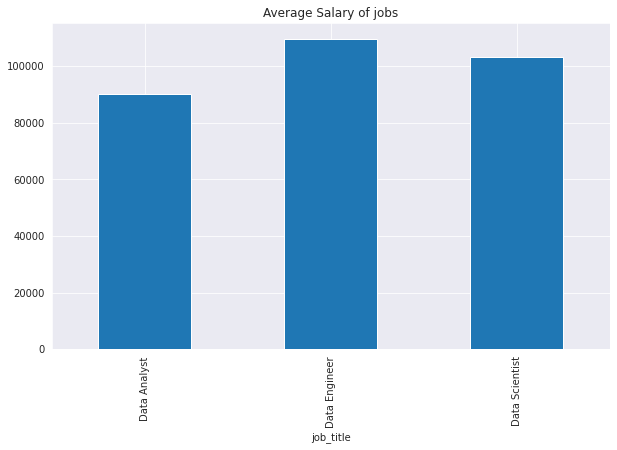

In [17]:
Target_jobs.groupby('job_title').mean()['salary_in_usd'].plot(kind='bar',figsize=(10,6),title='Average Salary of jobs');

In [18]:
px.histogram(Target_jobs, x=Target_jobs.job_title.sort_values(), color = 'work_year', barmode = 'group',
             text_auto  = True, title = 'Growth of jobs over years')

# conclusion
> * Data scientist is the most jobs growth
> * Data Engineer is the highest salary 
> * United states is the most countries have data science jobs
> * Most Companies are in meduim size
> * Most employees are in senoir level
> * Most jobs are fully remote
> * Most employees work data science jobs as a full time job
 

